In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# null values

<AxesSubplot:>

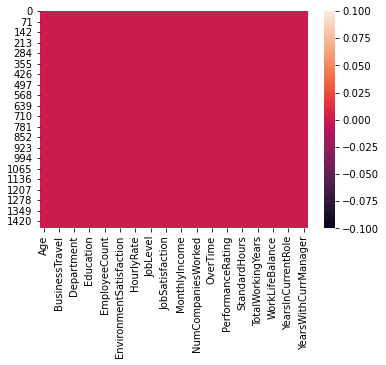

In [5]:
sb.heatmap(df.isnull())

In [6]:
numdf=df.select_dtypes(include=np.number)
catdf=df.select_dtypes(exclude=np.number)

In [7]:
print(numdf.columns)
print(catdf.columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount',
       'EmployeeNumber', 'HourlyRate', 'JobLevel', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'],
      dtype='object')


In [8]:
for i in catdf.columns:
    print(catdf[i].unique())

['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['College' 'Below College' 'Master' 'Bachelor' 'Doctor']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Medium' 'High' 'Very High' 'Low']
['Female' 'Male']
['High' 'Medium' 'Very High' 'Low']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Very High' 'Medium' 'High' 'Low']
['Single' 'Married' 'Divorced']
['Y']
['Yes' 'No']
['Excellent' 'Outstanding']
['Low' 'Very High' 'Medium' 'High']
['Bad' 'Better' 'Good' 'Best']


In [9]:
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings
warnings.filterwarnings("ignore")

In [15]:
df=df.drop(['EmployeeCount','StandardHours'],1)

In [16]:
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar = dict(title = "Pearson Correlation coefficients", titleside = "right"),
                  )
layout = go.Layout(dict(title = "Correlation matrix",
                        autosize = False,
                        height = 720,
                        width = 800,
                        margin = dict(r = 0, l = 210, t = 25, b = 210),
                        yaxis = dict(tickfont = dict(size = 9)),
                        xaxis = dict(tickfont = dict(size = 9))
                       )
                  )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [12]:
numdf['EmployeeCount'].unique()

array([1], dtype=int64)

In [14]:
numdf['StandardHours'].unique()

array([80], dtype=int64)

# Outlier treatment

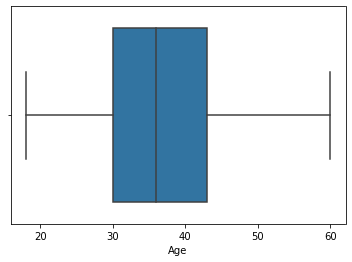

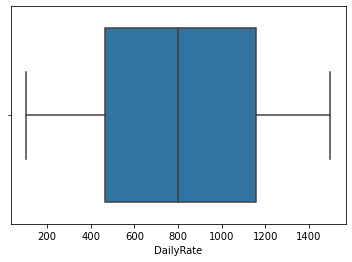

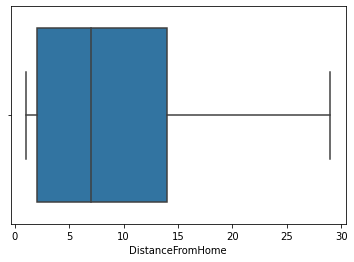

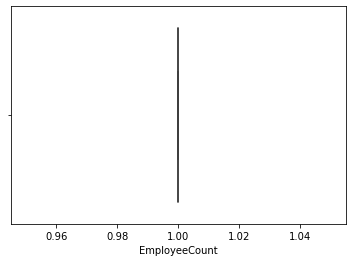

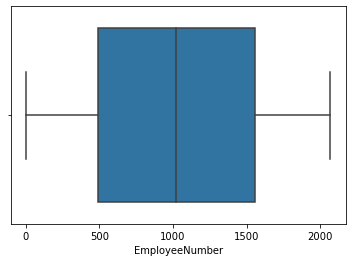

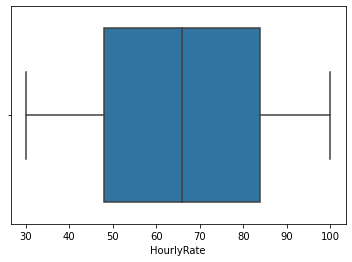

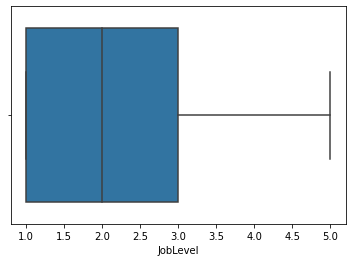

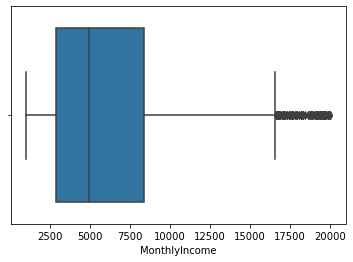

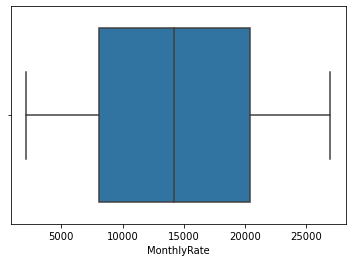

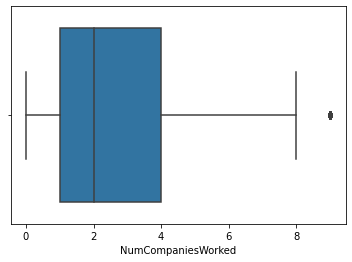

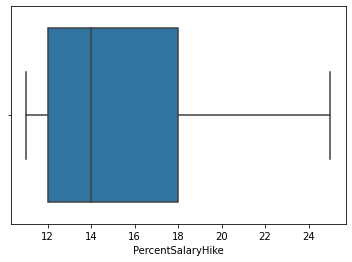

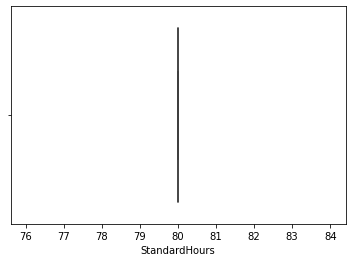

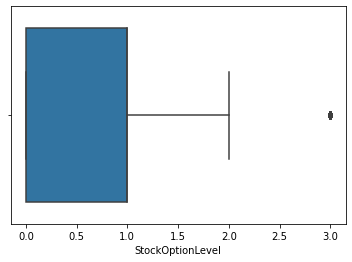

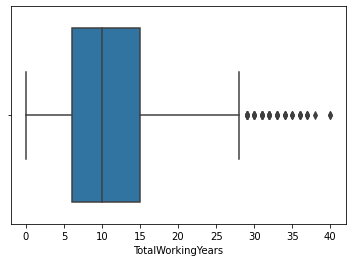

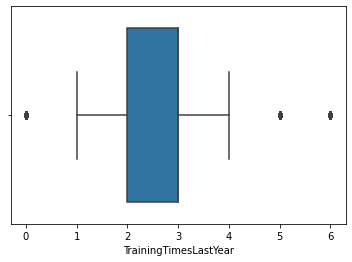

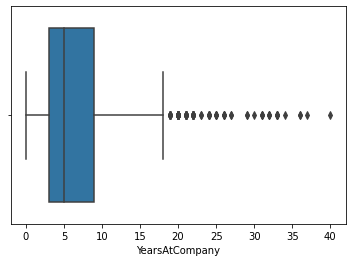

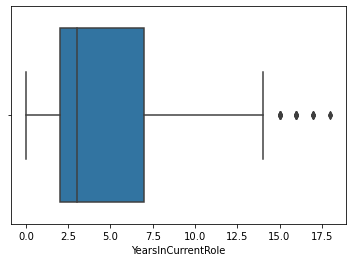

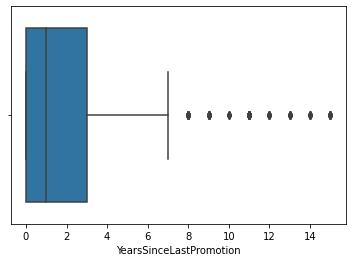

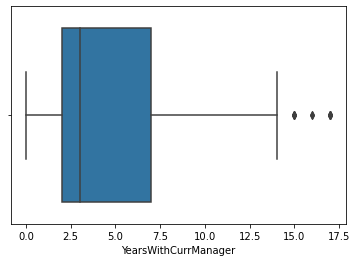

In [18]:
for i in numdf.columns:
    sb.boxplot(numdf[i])
    plt.show()

# EDA (univariate,bivariate,multivariate)

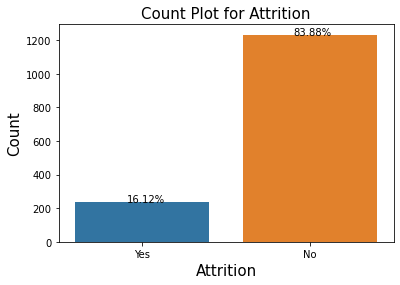

In [19]:
sb.countplot(catdf['Attrition'])
plt.text(x = -0.09, y = catdf['Attrition'].value_counts()['Yes'] , s = str(round((catdf['Attrition'].value_counts()['Yes'])*100/len(catdf['Attrition']),2)) + '%')
plt.text(x = 0.9,y = catdf['Attrition'].value_counts()['No'] , s = str(round((catdf['Attrition'].value_counts()['No'])*100/len(catdf['Attrition']),2)) + '%')

plt.title('Count Plot for Attrition', fontsize = 15)
plt.xlabel('Attrition', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [20]:
# data is highly imbalanced

In [27]:
numdf=numdf.drop(['EmployeeCount','StandardHours'],1)

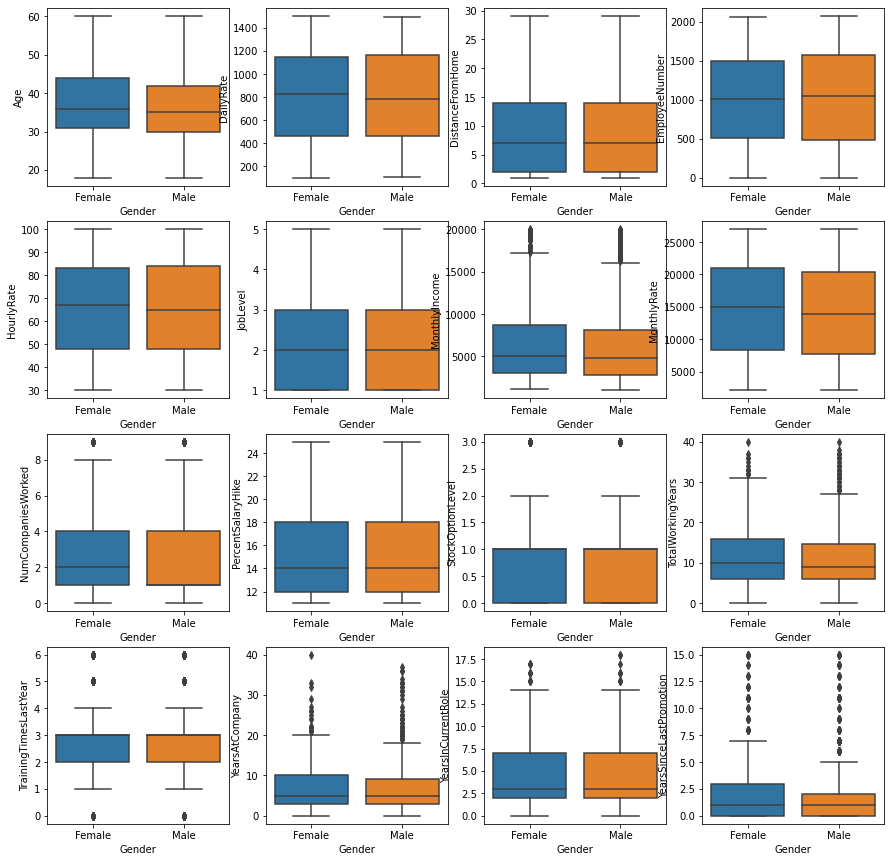

In [29]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize=(15,15))
for variable, subplot in zip(numdf.columns, ax.flatten()):
    
    if variable == "Attrition":
        continue
    else:
        sb.boxplot(x = df["Gender"],y =df[variable], ax = subplot)
plt.show()

In [25]:
catdf.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'],
      dtype='object')

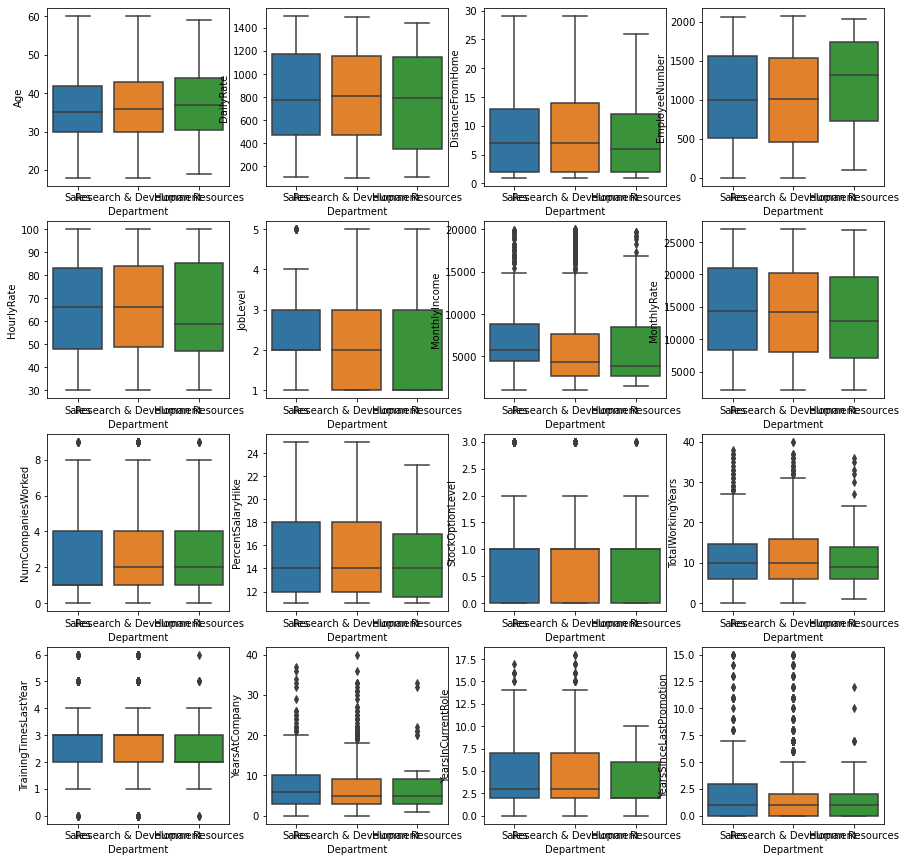

In [30]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize=(15,15))
for variable, subplot in zip(numdf.columns, ax.flatten()):
    
    if variable == "Attrition":
        continue
    else:
        sb.boxplot(x = df["Department"],y =df[variable], ax = subplot)
plt.show()

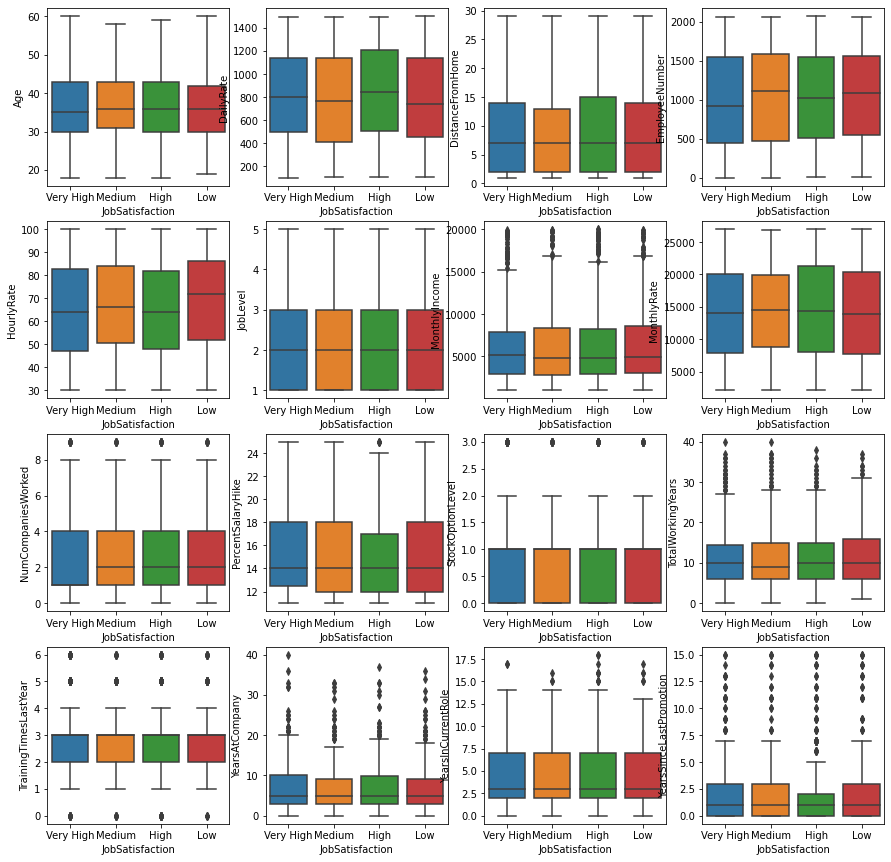

In [31]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize=(15,15))
for variable, subplot in zip(numdf.columns, ax.flatten()):
    
    if variable == "Attrition":
        continue
    else:
        sb.boxplot(x = df["JobSatisfaction"],y =df[variable], ax = subplot)
plt.show()

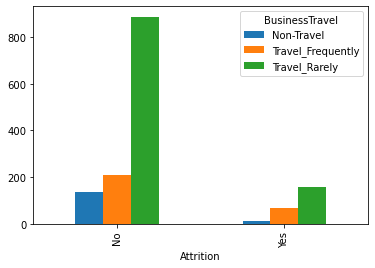

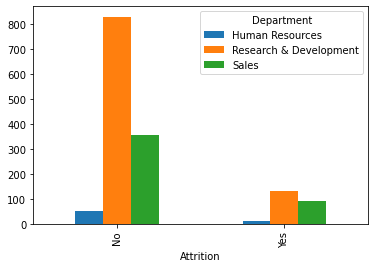

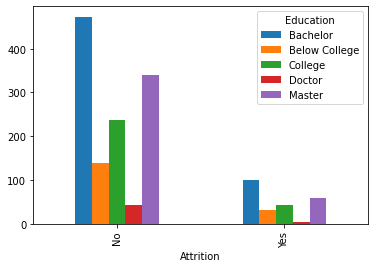

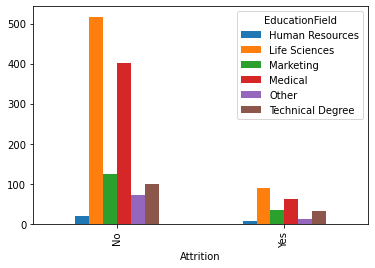

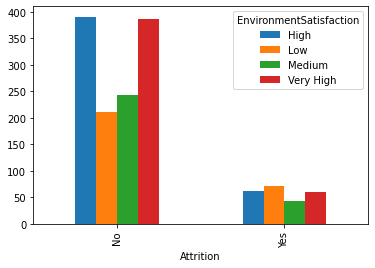

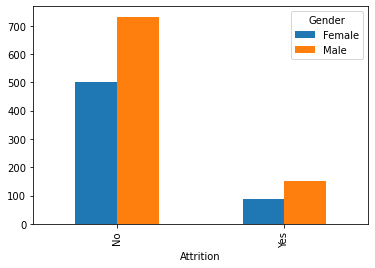

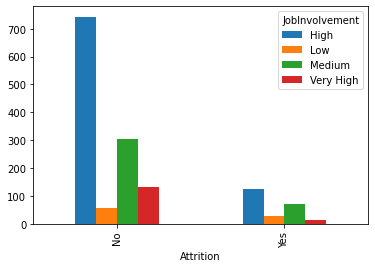

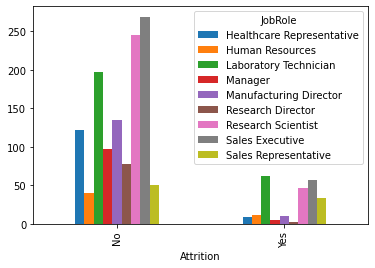

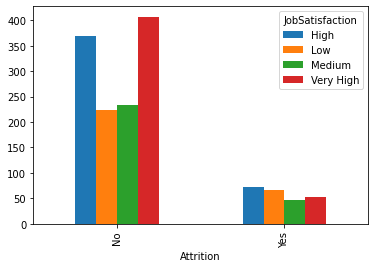

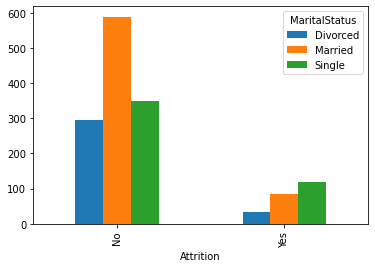

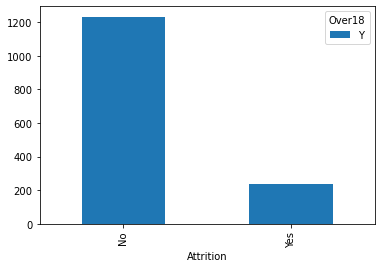

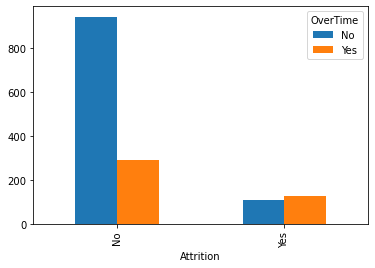

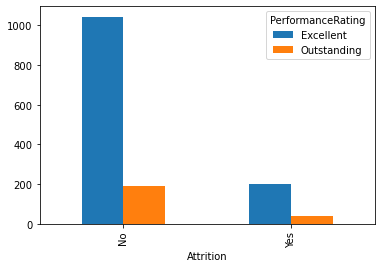

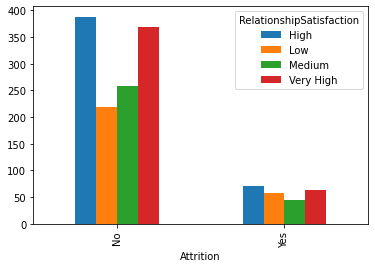

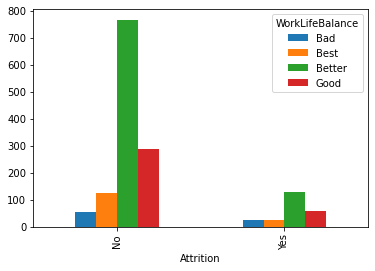

In [33]:
for i in catdf.columns:
    
    if i == 'Attrition':
        
        continue
    else:
        pd.crosstab(df['Attrition'],df[i]).plot(kind='bar')
        plt.show()


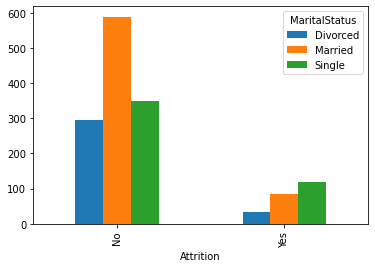

In [34]:
pd.crosstab(df['Attrition'],df['MaritalStatus']).plot(kind='bar')
plt.show()

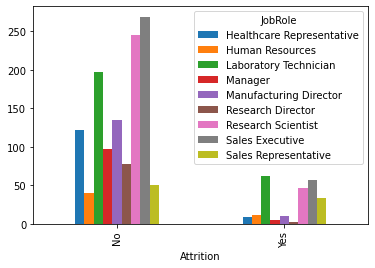

In [35]:
pd.crosstab(df['Attrition'],df['JobRole']).plot(kind='bar')
plt.show()

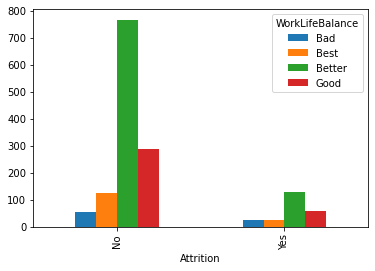

In [43]:
pd.crosstab(df['Attrition'],df['WorkLifeBalance']).plot(kind='bar')
plt.show()

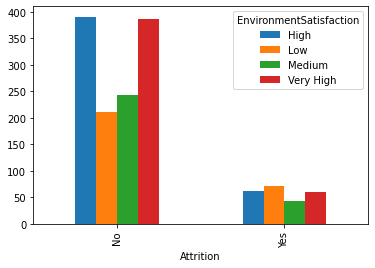

In [44]:
pd.crosstab(df['Attrition'],df['EnvironmentSatisfaction']).plot(kind='bar')
plt.show()

In [36]:
print(numdf.columns)
print(catdf.columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'],
      dtype='object')


<AxesSubplot:xlabel='Age', ylabel='DistanceFromHome'>

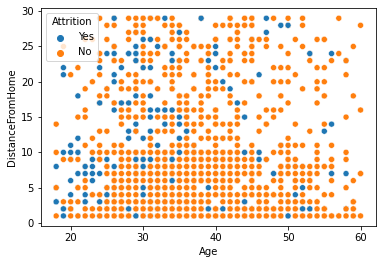

In [38]:
sb.scatterplot(df['Age'],df['DistanceFromHome'],hue=df['Attrition'])

<AxesSubplot:xlabel='MonthlyIncome', ylabel='PercentSalaryHike'>

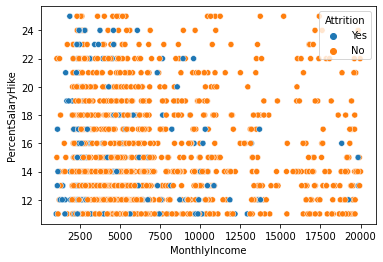

In [39]:
sb.scatterplot(df['MonthlyIncome'],df['PercentSalaryHike'],hue=df['Attrition'])

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='YearsInCurrentRole'>

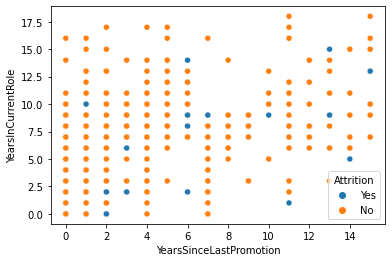

In [40]:
sb.scatterplot(df['YearsSinceLastPromotion'],df['YearsInCurrentRole'],hue=df['Attrition'])

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

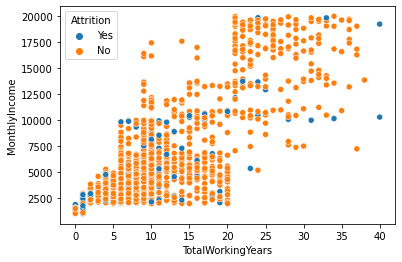

In [41]:
sb.scatterplot(df['TotalWorkingYears'],df['MonthlyIncome'],hue=df['Attrition'])

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='YearsAtCompany'>

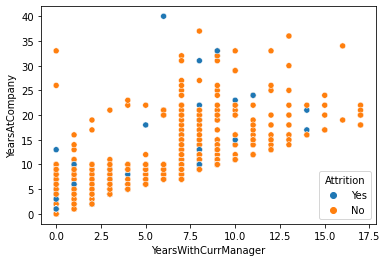

In [42]:
sb.scatterplot(df['YearsWithCurrManager'],df['YearsAtCompany'],hue=df['Attrition'])

<AxesSubplot:xlabel='MonthlyIncome', ylabel='PercentSalaryHike'>

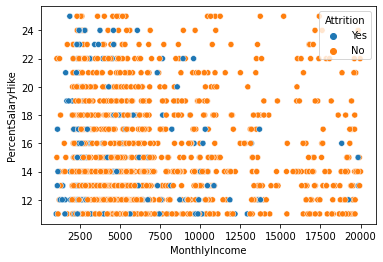

In [48]:
sb.scatterplot(df['MonthlyIncome'],df['PercentSalaryHike'],hue=df['Attrition'])

In [52]:
for i in catdf.columns:
    print(i,'_'*10,catdf[i].unique())

Attrition __________ ['Yes' 'No']
BusinessTravel __________ ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department __________ ['Sales' 'Research & Development' 'Human Resources']
Education __________ ['College' 'Below College' 'Master' 'Bachelor' 'Doctor']
EducationField __________ ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EnvironmentSatisfaction __________ ['Medium' 'High' 'Very High' 'Low']
Gender __________ ['Female' 'Male']
JobInvolvement __________ ['High' 'Medium' 'Very High' 'Low']
JobRole __________ ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
JobSatisfaction __________ ['Very High' 'Medium' 'High' 'Low']
MaritalStatus __________ ['Single' 'Married' 'Divorced']
Over18 __________ ['Y']
OverTime __________ ['Yes' 'No']
PerformanceRating __________ ['Excellent' 'Outstanding']
Relationshi

In [53]:
df['Attrition']=df['Attrition'].replace({'Yes':1,'No':0})
df['BusinessTravel']=df['BusinessTravel'].replace({'Travel_Rarely':0,'Travel_Frequently':1,'Non-Travel':2})
df['Department']=df['Department'].replace({'Sales':0,'Research & Development':1,'Human Resources':2})
df['Education']=df['Education'].replace({'College':0,'Below College':1,'Master':2,'Bachelor':3,'Doctor':4})
df['EducationField']=df['EducationField'].replace({'Life Sciences':0,'Other':1,'Medical':2,'Marketing':3,'Technical Degree':4,
 'Human Resources':5})
df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].replace({'Medium':0,'High':1,'Very High':2,'Low':3})
df['Gender']=df['Gender'].replace({'Female':0,'Male':1})
df['JobInvolvement']=df['JobInvolvement'].replace({'High':0,'Medium':1,'Very High':2,'Low':3})
df['JobRole']=df['JobRole'].replace({'Sales Executive':0,'Research Scientist':1,'Laboratory Technician':2,
 'Manufacturing Director':3,'Healthcare Representative':4,'Manager':5,
 'Sales Representative':6,'Research Director':7,'Human Resources':8})
df['JobSatisfaction']=df['JobSatisfaction'].replace({'Very High':0,'Medium':1,'High':2,'Low':3})
df['MaritalStatus']=df['MaritalStatus'].replace({'Single':0,'Married':1,'Divorced':2})
df['OverTime']=df['OverTime'].replace({'Yes':0,'No':1})
df['PerformanceRating']=df['PerformanceRating'].replace({'Excellent':0,'Outstanding':1})
df['RelationshipSatisfaction']=df['RelationshipSatisfaction'].replace({'Low':0,'Very High':1,'Medium':2,'High':3})
df['WorkLifeBalance']=df['WorkLifeBalance'].replace({'Bad':0,'Better':1,'Good':2,'Best':3})

In [54]:
df=df.drop('Over18',1)

In [55]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,0,1,0,0,1,0,...,0,0,0,8,0,0,6,4,0,5
1,49,0,1,279,1,8,1,0,2,1,...,1,1,1,10,3,1,10,7,1,7
2,37,1,0,1373,1,2,0,1,4,2,...,0,2,0,7,3,1,0,0,0,0
3,33,0,1,1392,1,3,2,0,5,2,...,0,3,0,8,3,1,8,7,3,0
4,27,0,0,591,1,2,1,2,7,3,...,0,1,1,6,3,1,2,2,2,2


In [57]:
from scipy import stats

In [58]:
p_val = []
sig = []
for i in df.columns:
    if i in numdf:
        stat, p = stats.ttest_ind(df[df['Attrition'] == 0][i], df[df['Attrition'] == 1][i])
    else:
        ct = pd.crosstab(df[i], df['Attrition'])
        stat, p, dof, exp = stats.chi2_contingency(ct)
    p_val.append(p)
    if p < 0.05:
        sig.append('Significant')
    else:
        sig.append("Insignificant")
stats_df1 = pd.DataFrame({"columns" : df.columns, "p_value" : p_val, "significance" : sig})
stats_df1

,columns,p_value,significance
0,Age,8.356308e-10,Significant
1,Attrition,0.000000e+00,Significant
2,BusinessTravel,5.608614e-06,Significant
3,DailyRate,2.985816e-02,Significant
4,Department,4.525607e-03,Significant
5,DistanceFromHome,2.793060e-03,Significant
6,Education,5.455253e-01,Insignificant
7,EducationField,6.773980e-03,Significant
8,EmployeeNumber,6.853276e-01,Insignificant
9,EnvironmentSatisfaction,5.123469e-05,Significant


In [60]:
df=df.drop(['Education','EmployeeNumber','Gender', 'HourlyRate','MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','YearsSinceLastPromotion'],1)

In [64]:
numdf1=df.drop(['Attrition', 'BusinessTravel', 'Department',
       'EducationField', 'EnvironmentSatisfaction',  'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus',  'OverTime',
         'WorkLifeBalance'],
    1)

In [61]:
df1=df.copy()

In [62]:
catdf.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'],
      dtype='object')

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
numdf2=sc.fit_transform(numdf1)
scaled_df=pd.DataFrame(numdf2,columns=numdf1.columns)
scaled_df.shape

(1470, 11)

In [69]:
catdf1=df.drop(['Age', 'DailyRate', 'DistanceFromHome',
       'JobLevel', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsWithCurrManager'],1)

In [66]:
numdf.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [73]:
fin_df1=pd.concat([scaled_df,catdf1],1)

In [74]:
fin_df1.head()

,Age,DailyRate,DistanceFromHome,JobLevel,MonthlyIncome,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,...,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,WorkLifeBalance
0,0.446350,0.742527,-1.010909,-0.057788,-0.108350,-0.932014,-0.421642,-2.171982,-0.164613,-0.063296,...,0,0,0,0,0,0,0,0,0,0
1,1.322365,-1.297775,-0.147150,-0.057788,-0.291719,0.241988,-0.164511,0.155707,0.488508,0.764998,...,1,1,0,1,1,1,1,1,1,1
2,0.008343,1.414363,-0.887515,-0.961486,-0.937654,-0.932014,-0.550208,0.155707,-1.144294,-1.167687,...,0,1,1,2,1,2,2,0,0,1
3,-0.429664,1.461466,-0.764121,-0.961486,-0.763634,-0.932014,-0.421642,0.155707,0.161947,0.764998,...,1,1,0,2,0,1,2,1,0,1
4,-1.086676,-0.524295,-0.887515,-0.961486,-0.644858,0.241988,-0.678774,0.155707,-0.817734,-0.615492,...,0,1,2,3,0,2,1,1,1,1


In [76]:
x=fin_df1.drop('Attrition',1)
y=fin_df1['Attrition']

# Model building

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=100)

In [79]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [86]:
def telecom_churn_prediction(algorithm, training_x, testing_x, training_y, testing_y, cf):
    #model
    algorithm.fit(xtrain,ytrain)
    predictions = algorithm.predict(xtest)
    probabilities = algorithm.predict_proba(xtest)
        
    print('Algorithm:', type(algorithm).__name__)
    print("\nClassification report:\n", classification_report(ytest, predictions))
    print("Accuracy Score:", accuracy_score(ytest, predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(ytest, predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(ytest, predictions) 
    print("Area under curve:", model_roc_auc,"\n")
    
    fpr, tpr, thresholds = roc_curve(ytest, probabilities[:,1])
     
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix,
                        x = ["Not churn", "Churn"],
                        y = ["Not churn", "Churn"],
                        showscale = False, colorscale = "Picnic",
                        name = "Confusion matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr, y = tpr,
                        name = "Roc: " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'), width = 2))
    trace3 = go.Scatter(x = [0,1], y = [0,1],
                        line = dict(color = ('rgb(205, 12, 24)'), width = 2,
                        dash = 'dot'))
    
    if cf in ['coefficients', 'features']:
        if cf == 'coefficients':
            coefficients = pd.DataFrame(algorithm.coef_.ravel())
        elif cf == 'features':
            coefficients = pd.DataFrame(algorithm.feature_importances_)
        
        column_df = pd.DataFrame(xtrain.columns.tolist())
        coef_sumry = (pd.merge(coefficients, column_df, left_index=True, 
                               right_index=True, how="left"))
        coef_sumry.columns = ["coefficients", "features"]
        coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending=False)
        
        #plot coeffs
        trace4 = go.Bar(x = coef_sumry["features"], y = coef_sumry["coefficients"], 
                        name = "coefficients",
                        marker = dict(color = coef_sumry["coefficients"],
                                      colorscale = "Picnic",
                                      line = dict(width = .6, color = "black")
                                     )
                       )
        #subplots
        fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                                subplot_titles=('Confusion matrix',
                                                'Receiver operating characteristic',
                                                'Feature importances')
                           )  
        fig.append_trace(trace1,1,1)
        fig.append_trace(trace2,1,2)
        fig.append_trace(trace3,1,2)
        fig.append_trace(trace4,2,1)
        fig['layout'].update(showlegend=False, title="Model performance",
                             autosize=False, height = 900, width = 800,
                             plot_bgcolor = 'rgba(240,240,240, 0.95)',
                             paper_bgcolor = 'rgba(240,240,240, 0.95)',
                             margin = dict(b = 195))
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
        fig["layout"]["xaxis3"].update(dict(showgrid = True, tickfont = dict(size = 10), tickangle = 90))
        
    elif cf == 'None':
        #subplots
        fig = make_subplots(rows=1, cols=2,
                            subplot_titles=('Confusion matrix',
                                            'Receiver operating characteristic')
                           )
        fig.append_trace(trace1,1,1)
        fig.append_trace(trace2,1,2)
        fig.append_trace(trace3,1,2)
        fig['layout'].update(showlegend=False, title="Model performance",
                         autosize=False, height = 500, width = 800,
                         plot_bgcolor = 'rgba(240,240,240,0.95)',
                         paper_bgcolor = 'rgba(240,240,240,0.95)',
                         margin = dict(b = 195))
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))  
        
    py.iplot(fig)
    
    

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score

import statsmodels.api as sm


In [87]:
telecom_churn_prediction(lr,xtrain,xtest,ytrain,ytest,'coefficients')

Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       371
           1       0.58      0.27      0.37        70

    accuracy                           0.85       441
   macro avg       0.73      0.62      0.64       441
weighted avg       0.83      0.85      0.83       441

Accuracy Score: 0.8526077097505669
Area under curve: 0.6168463611859838 



In [89]:
from imblearn.over_sampling import SMOTE

#oversampling minority class using smote
smote = SMOTE(random_state = 0)
x_smote, y_smote = smote.fit_resample(xtrain, ytrain)


In [90]:
telecom_churn_prediction(lr,x_smote,xtest,y_smote,ytest,'coefficients')

Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       371
           1       0.58      0.27      0.37        70

    accuracy                           0.85       441
   macro avg       0.73      0.62      0.64       441
weighted avg       0.83      0.85      0.83       441

Accuracy Score: 0.8526077097505669
Area under curve: 0.6168463611859838 



In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [92]:
rf=RandomForestClassifier()
Dt=DecisionTreeClassifier()

In [94]:
telecom_churn_prediction(rf,xtrain,xtest,ytrain,ytest,'features')

Algorithm: RandomForestClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       371
           1       0.67      0.20      0.31        70

    accuracy                           0.86       441
   macro avg       0.77      0.59      0.61       441
weighted avg       0.83      0.86      0.82       441

Accuracy Score: 0.8571428571428571
Area under curve: 0.590566037735849 



In [96]:
telecom_churn_prediction(Dt,xtrain,xtest,ytrain,ytest,'features')

Algorithm: DecisionTreeClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       371
           1       0.40      0.43      0.41        70

    accuracy                           0.81       441
   macro avg       0.65      0.65      0.65       441
weighted avg       0.81      0.81      0.81       441

Accuracy Score: 0.8072562358276644
Area under curve: 0.6536388140161725 



In [97]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [98]:
gb=GradientBoostingClassifier()
ad=AdaBoostClassifier()

In [100]:
telecom_churn_prediction(gb,xtrain,xtest,ytrain,ytest,'features')

Algorithm: GradientBoostingClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       371
           1       0.65      0.29      0.40        70

    accuracy                           0.86       441
   macro avg       0.76      0.63      0.66       441
weighted avg       0.84      0.86      0.84       441

Accuracy Score: 0.8616780045351474
Area under curve: 0.628032345013477 



In [101]:
telecom_churn_prediction(ad,xtrain,xtest,ytrain,ytest,'features')

Algorithm: AdaBoostClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       371
           1       0.63      0.37      0.47        70

    accuracy                           0.87       441
   macro avg       0.76      0.67      0.70       441
weighted avg       0.85      0.87      0.85       441

Accuracy Score: 0.8662131519274376
Area under curve: 0.665498652291105 

